In [1]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import seaborn as sns

In [19]:
df=pd.read_csv("C:/Users/HP/Documents/Pokemon.csv",index_col=0)

In [20]:
df.head()

Name Type 1  Type 2  Total  HP  Attack  Defense  Sp. Atk  Sp. Def  \
#                                                                            
1   Bulbasaur  Grass  Poison    318  45      49       49       65       65   
2     Ivysaur  Grass  Poison    405  60      62       63       80       80   
3    Venusaur  Grass  Poison    525  80      82       83      100      100   
4  Charmander   Fire     NaN    309  39      52       43       60       50   
5  Charmeleon   Fire     NaN    405  58      64       58       80       65   

   Speed  Stage Legendary  
#                          
1     45      1     False  
2     60      2     False  
3     80      3     False  
4     65      1     False  
5     80      2     False

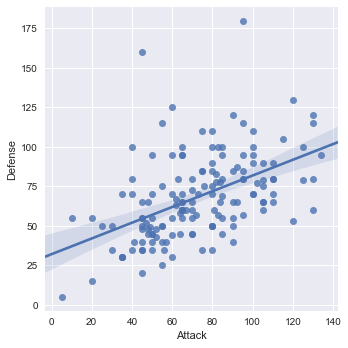

In [22]:
sns.lmplot(x='Attack',y='Defense',data=df)

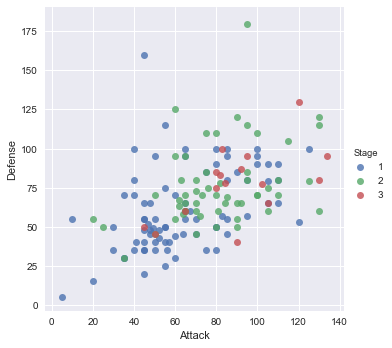

In [24]:
sns.lmplot(x='Attack',y='Defense',fit_reg=False,hue='Stage',data=df)

(0, 142.25647612435475)

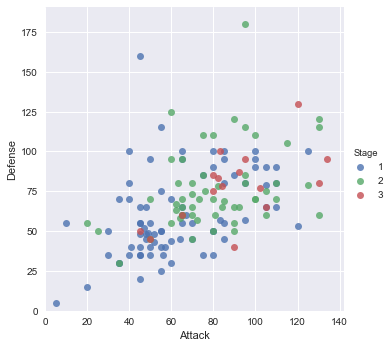

In [25]:
sns.lmplot(x='Attack',y='Defense',fit_reg=False,hue='Stage',data=df)
plt.ylim(0,None)
plt.xlim(0,None)

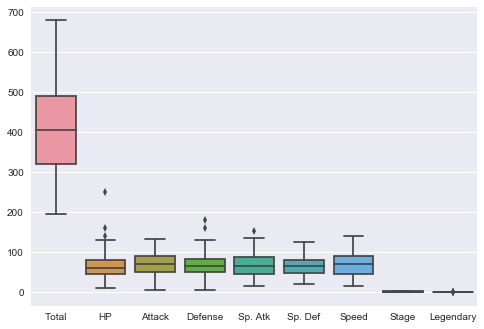

In [27]:
sns.boxplot(data=df)

In [28]:
stats_df=df.drop(['Total','Stage','Legendary'],axis=1)

C:\Users\HP\Anaconda3\lib\site-packages\seaborn\categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


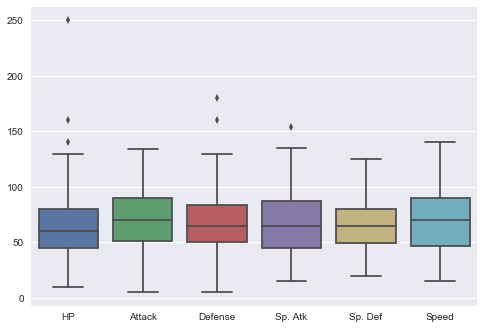

In [29]:
sns.boxplot(stats_df)

In [30]:
sns.set_style("whitegrid")

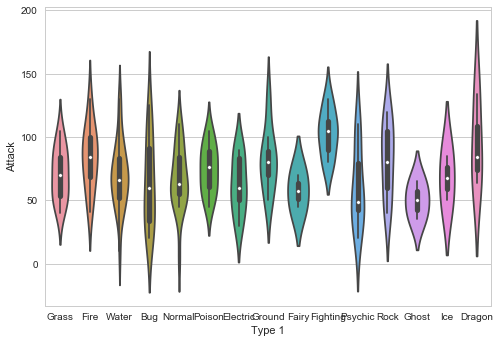

In [32]:
sns.violinplot(x='Type 1',y='Attack',data=df)

In [33]:
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

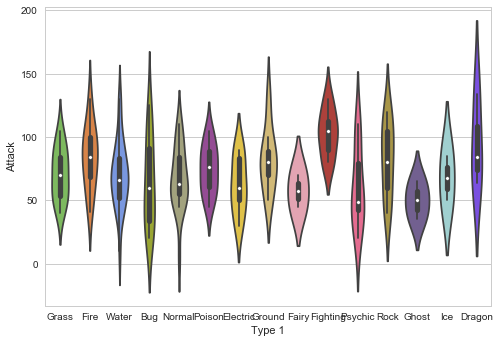

In [34]:
sns.violinplot(x='Type 1',y='Attack',data=df,palette=pkmn_type_colors)

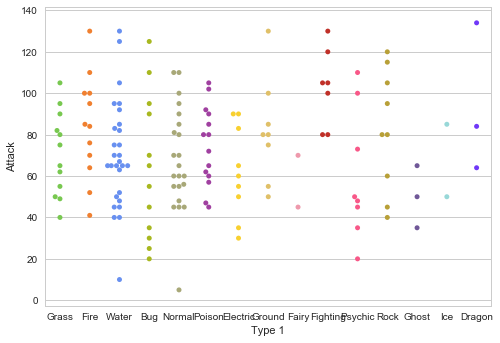

In [35]:
sns.swarmplot(x='Type 1',y='Attack',data=df,palette=pkmn_type_colors)

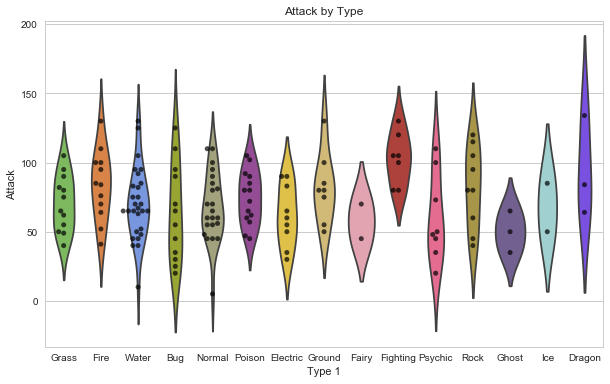

In [39]:
plt.figure(figsize=(10,6))
sns.violinplot(x='Type 1',
               y='Attack', 
               data=df, 
               inner=None,
               palette=pkmn_type_colors)
sns.swarmplot(x='Type 1', 
              y='Attack', 
              data=df, 
              color='k',
              alpha=0.7)
plt.title('Attack by Type')

In [40]:
stats_df.head()

Name Type 1  Type 2  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed
#                                                                         
1   Bulbasaur  Grass  Poison  45      49       49       65       65     45
2     Ivysaur  Grass  Poison  60      62       63       80       80     60
3    Venusaur  Grass  Poison  80      82       83      100      100     80
4  Charmander   Fire     NaN  39      52       43       60       50     65
5  Charmeleon   Fire     NaN  58      64       58       80       65     80

In [42]:
melted_df = pd.melt(stats_df, 
                    id_vars=["Name", "Type 1", "Type 2"], # Variables to keep
                    var_name="Stat")
melted_df.head()

Name Type 1  Type 2 Stat  value
0   Bulbasaur  Grass  Poison   HP     45
1     Ivysaur  Grass  Poison   HP     60
2    Venusaur  Grass  Poison   HP     80
3  Charmander   Fire     NaN   HP     39
4  Charmeleon   Fire     NaN   HP     58

In [43]:
stats_df.shape

(151, 9)

In [44]:
melted_df.shape

(906, 5)

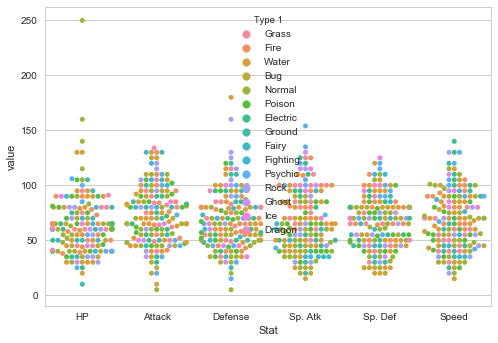

In [45]:
sns.swarmplot(x='Stat', y='value', data=melted_df, 
              hue='Type 1')

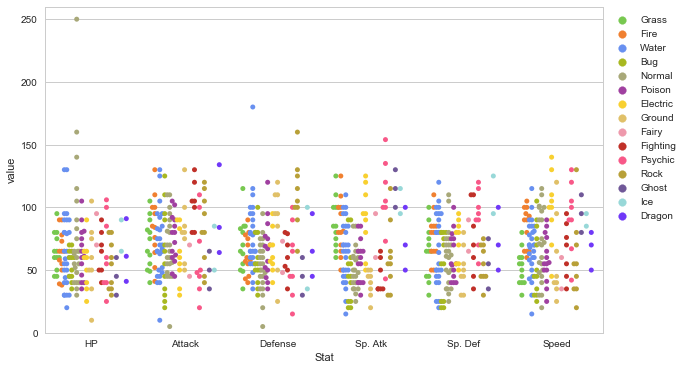

In [46]:
plt.figure(figsize=(10,6))
sns.swarmplot(x='Stat', 
              y='value', 
              data=melted_df, 
              hue='Type 1', 
              split=True, # 2. Separate points by hue
              palette=pkmn_type_colors)
plt.ylim(0, 260)
plt.legend(bbox_to_anchor=(1, 1), loc=2)

In [47]:
corr=stats_df.corr()

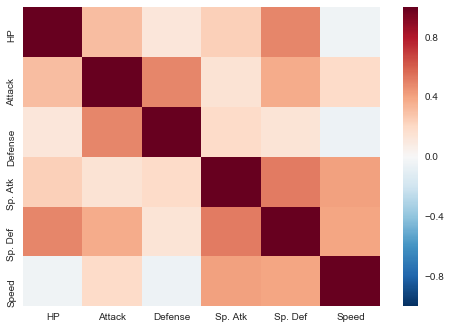

In [48]:
sns.heatmap(corr)

TypeError: slice indices must be integers or None or have an __index__ method

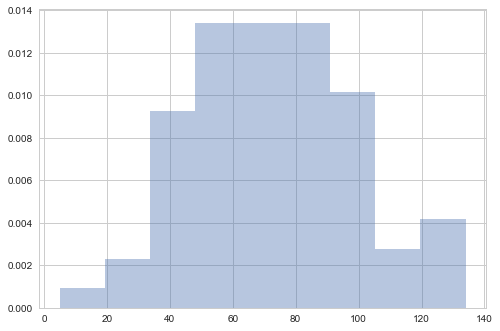

In [49]:
sns.distplot(df.Attack)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

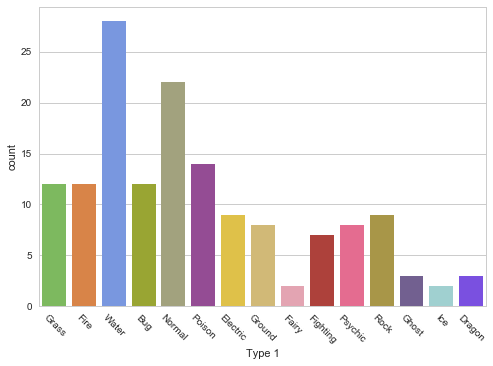

In [52]:
sns.countplot(x='Type 1', data=df, palette=pkmn_type_colors)
plt.xticks(rotation=-45)

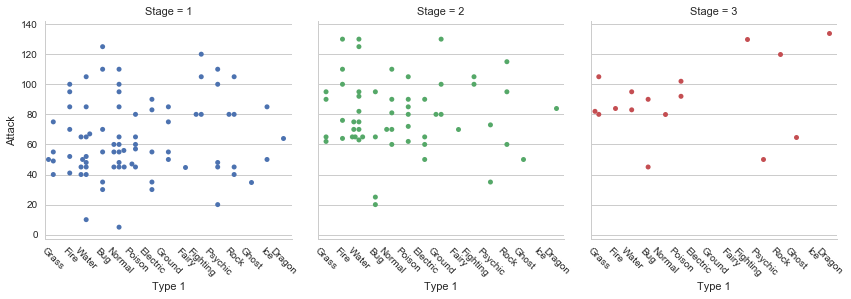

In [53]:
g = sns.factorplot(x='Type 1', 
                   y='Attack', 
                   data=df, 
                   hue='Stage',
                   col='Stage',
                   kind='swarm')
g.set_xticklabels(rotation=-45)

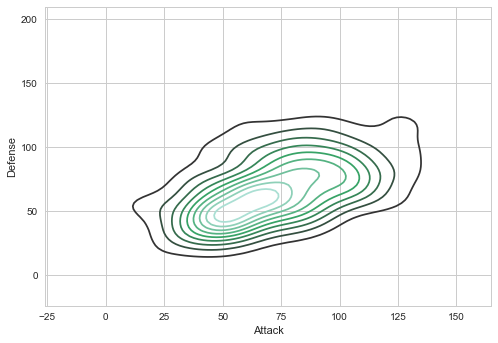

In [54]:
sns.kdeplot(df.Attack, df.Defense)

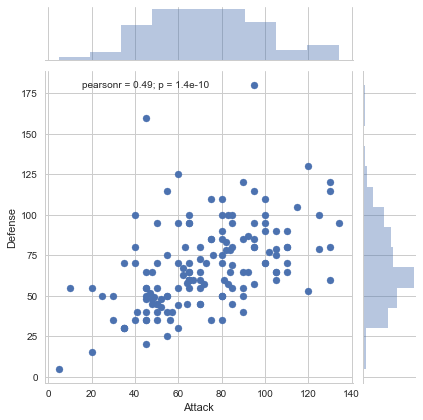

In [55]:
sns.jointplot(x='Attack', y='Defense', data=df)